
# New York City Filming Permits Analysis Report

### Zihao Huang

## Introduction

### About the report
New York City is one of the most representative film and television filming locations in the world, and the location, as city property, requires permission from the Mayor's Office of Media and Entertainment.The report uses the New York City open data film licensing data set（ https://data.cityofnewyork.us/City-Government/Film-Permits/tg4x-b46p ）To explore the shooting trend around the city, and carry out relevant statistical analysis and data visualization for a set of needs.The report presents the quantity statistics and trend of shooting projects every month, and compares and analyzes the impact during covid-19. In addition, it also reflects the overall distribution of shooting duration and shooting categories and boroughs, and compares them in different categories and boroughs. Finally, the report investigates which precinct in New York City is most often photographed, where the types of works are photographed, and the shooting situation in different countries / regions.
### Data set
The analysis of this report is based on a data set of film license information issued from early 2012 to the end of 2021. This is a CSV data file with 14 columns and 74449 rows, which contains the details of shooting items such as shooting time, region, type and country.When using this file, some types of data need to be preprocessed (for example, the time information needs to be adjusted to the standard datetime format, and some elements juxtaposed by "," need to be separated, etc.) in order to carry out statistical analysis and visualization.


In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from pandas import DataFrame

#Import and read data
dataset = pd.read_csv("Film_Permits.csv")
#dataset.head()

## Monthly shooting statistics

### Definition of covid-19 period
Comprehensively consider the 'New York State on pause' executive order signed by the governor of New York state(https://www.governor.ny.gov/news/governor-cuomo-signs-new-york-state-pause-executive-order)with its implementation date and duration, and an overview of covid-19 long-term trends on the New York City Health website(https://www1.nyc.gov/site/doh/covid/covid-19-data-totals.page)As well as other relevant reports, this report defines the period from **March 2020 to September 2020** as the period when film and television shooting in New York City is affected by covid-19, and the "covid-19 period" referred to later refers to this period.

In [51]:
#Although time data can be found in the column of StartDateTime, it is not in the standard datetime format and needs format processing
dataset.StartDateTime = pd.to_datetime(dataset.StartDateTime)

#Set the format of the original date to the form of "year month" through strftime ('% Y - % m')
#And converted to dataframe for calculation
dataset_Q2 = dataset["StartDateTime"].apply(lambda x:x.strftime("%Y-%m"))
dataset_Q2 = pd.DataFrame(dataset_Q2)

#Count the number of shooting projects per month and each year, and sort them by date
dataset_Q2.columns = ["Month"]
dataset_Q2 = dataset_Q2["Month"].value_counts().sort_index()

#Generate a copy in datafarme form for dataset_Q2 to see the exact data
#Can specify "year-month" according to the index search
monthcount = pd.DataFrame(dataset_Q2)
monthcount.columns = ["Number"]
monthcount.head()

,Number
2012-01,385
2012-02,502
2012-03,626
2012-04,623
2012-05,639


In [52]:
#Show descriptive statistics
dataset_Q2.describe()

count     117.000000
mean      636.307692
std       186.149479
min         1.000000
25%       538.000000
50%       643.000000
75%       763.000000
max      1129.000000
Name: Month, dtype: float64

In [1]:
#Draw a horizontal column chart
#dataset_Q2.plot(kind="barh",title = "Year - Month horizontal column chart",figsize=(9,18),fontsize=8)

<AxesSubplot:title={'center':'Year - Month line chart'}>

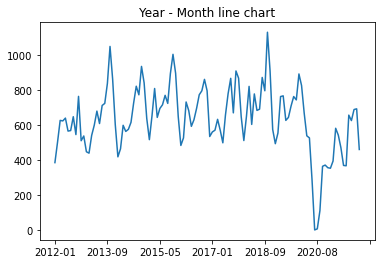

In [54]:
# draw a line chart
dataset_Q2.plot(kind="line",title = "Year - Month line chart")

- Without considering the time period affected by COVID-19, according to the "Year - Month line chart", it can be seen that the number of monthly shootings in New York City in general fluctuates cyclically.The trend is generally flat from year to year. According to the "Year - Month horizontal column chart", it can be analyzed that October every year is the peak of the number of shots in that year.


- It can be seen from "Year - Month line chart" that the number of shots fluctuated sharply and decreased sharply during the period affected by covid-19. In addition, it can be seen from "year - month horizontal column chart" that there were no recorded shooting items from April to June 2020, that is, the number of 0 shots for three consecutive months.

## Shooting duration analysis

In [55]:
#Convert EndDateTime to the standard datetime format
dataset.EndDateTime = pd.to_datetime(dataset.EndDateTime)

#The shooting duration is calculated from the variables StartDateTime and EndDateTime
dataset["ShootingDuration"] = ((dataset.EndDateTime - dataset.StartDateTime)/pd.Timedelta(1,'hour'))
dataset["ShootingDuration"].describe()

count    74448.000000
mean        19.979978
std         67.952627
min          0.016667
25%         13.500000
50%         15.000000
75%         16.000000
max       8687.966667
Name: ShootingDuration, dtype: float64

In [56]:
#Take one day (24 hours) as an interval to make an overview of the distribution of all sample data
duration_bins = [0, 24, 48, 72, 96, 120,144,168,8688]
alldata = pd.cut(x=dataset["ShootingDuration"],bins=duration_bins,right=True)

alldata.value_counts().sort_index()

(0, 24]        68512
(24, 48]        3441
(48, 72]         982
(72, 96]         427
(96, 120]        262
(120, 144]       170
(144, 168]       130
(168, 8688]      524
Name: ShootingDuration, dtype: int64

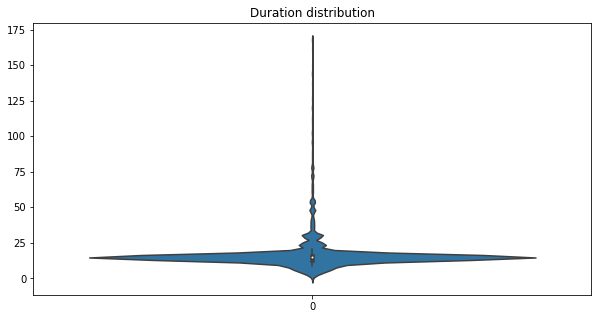

In [57]:
#According to the overview, in order to more intuitively reflect the distribution trend, samples within seven days (within 168 hours) 
#are selected as the analysis and visualization objects (most samples are concentrated in this interval).
dataset_Q3=dataset.loc[lambda x:x["ShootingDuration"]<=168]
plt.figure(figsize=(10,5))
plt.title("Duration distribution")
sns.violinplot(data = dataset_Q3["ShootingDuration"])
plt.show()

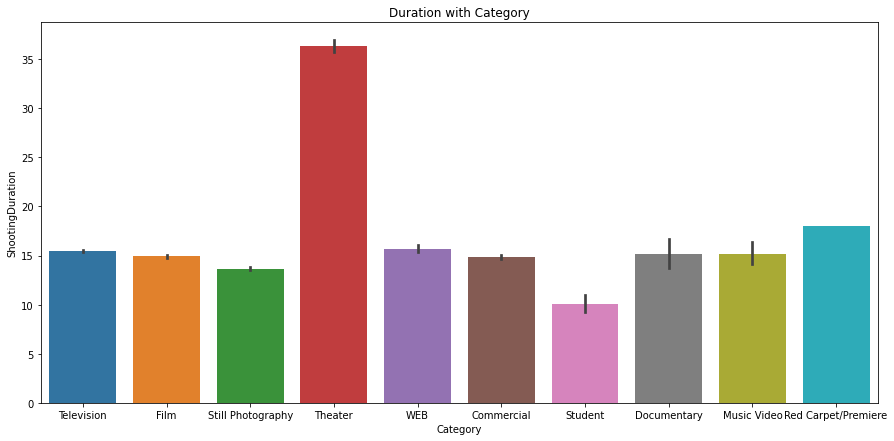

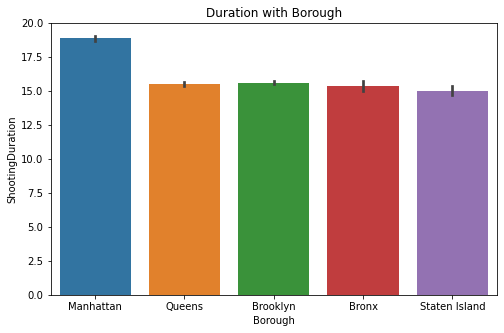

In [58]:
#Draw the distribution trend of duration and consider category
plt.figure(figsize=(15,7))
sns.barplot(x = dataset_Q3["Category"],y = dataset_Q3["ShootingDuration"])
plt.title("Duration with Category")
plt.show()

#Draw the distribution trend of duration and consider borough
plt.figure(figsize=(8,5))
sns.barplot(x = dataset_Q3["Borough"],y = dataset_Q3["ShootingDuration"])
plt.title("Duration with Borough")
plt.show()

- According to the feedback of descriptive statistics: the average shooting duration of all items is about 19.98 hours (2 decimal places are reserved), of which the shortest is about 0.017 hours (3 decimal places are reserved), and the longest is 8687.96 hours (2 decimal places are reserved).In addition, according to the distribution trend of shooting duration reflected in the figure "duration distribution", the duration of most projects is generally about 20 hours.


- The chart "Duration with Category" reflects the statistics of different shooting categories and durations. According to the chart, the longest duration is the theater (more than 35 hours) and the shortest is the student (about 10 hours), while the shooting duration of other categories is relatively close, generally maintained at about 15 hours, with small fluctuation range.


- The chart "Duration with Borough" reflects the statistics of different borough and duration. According to the chart, the longest duration is Manhattan (more than 17.5 hours), while the shooting duration of other borough is similar, which remains about 15 hours on the whole, with a small fluctuation range.

## Shooting Category Analysis_ Country / Region

In [59]:
#Only count the number of shooting categories
dataset["Category"].value_counts()

Television             41789
Film                   11570
Theater                 7160
Commercial              5826
Still Photography       4321
WEB                     2751
Student                  444
Documentary              337
Music Video              249
Red Carpet/Premiere        1
Name: Category, dtype: int64

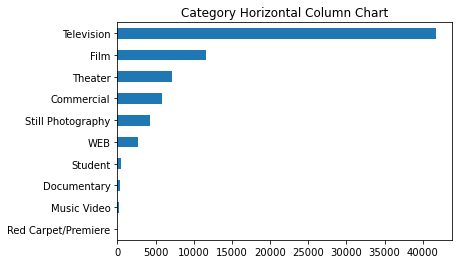

In [60]:
#Draw horizontal column chart
dataset_Q4 = dataset["Category"].value_counts()
dataset_Q4.plot(title = "Category Horizontal Column Chart",kind="barh").invert_yaxis()

In [61]:
#Statistics of shooting quantity in different countries
dataset["Country"].value_counts()

United States of America    74378
United Kingdom                 20
Canada                         17
Japan                           8
France                          7
Panama                          7
Australia                       5
Netherlands                     3
Ireland                         2
Germany                         1
Name: Country, dtype: int64

In [62]:
##Analyze and display shooting categories and consider countries
dataset.groupby(['Category','Country'])['EventID'].count()

Category             Country                 
Commercial           Canada                          4
                     United Kingdom                 12
                     United States of America     5810
Documentary          United Kingdom                  1
                     United States of America      336
Film                 Canada                          7
                     France                          1
                     Ireland                         2
                     Netherlands                     3
                     Panama                          7
                     United States of America    11550
Music Video          United States of America      249
Red Carpet/Premiere  United States of America        1
Still Photography    Australia                       1
                     United Kingdom                  4
                     United States of America     4316
Student              France                          6
                   

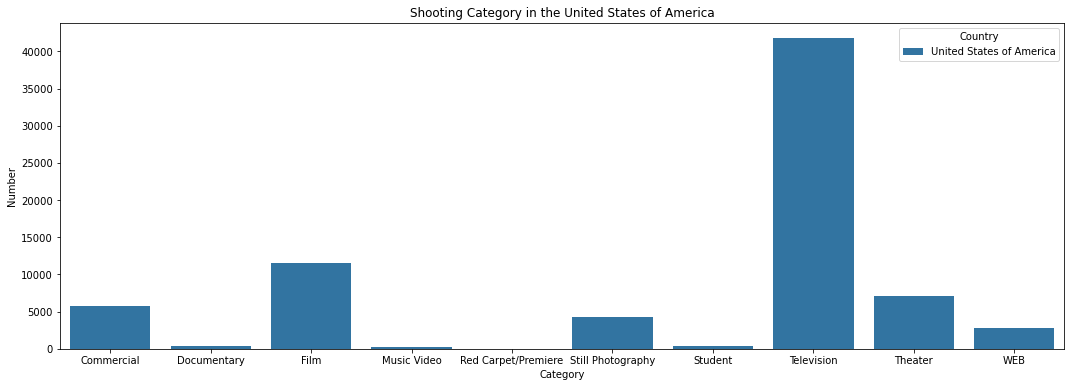

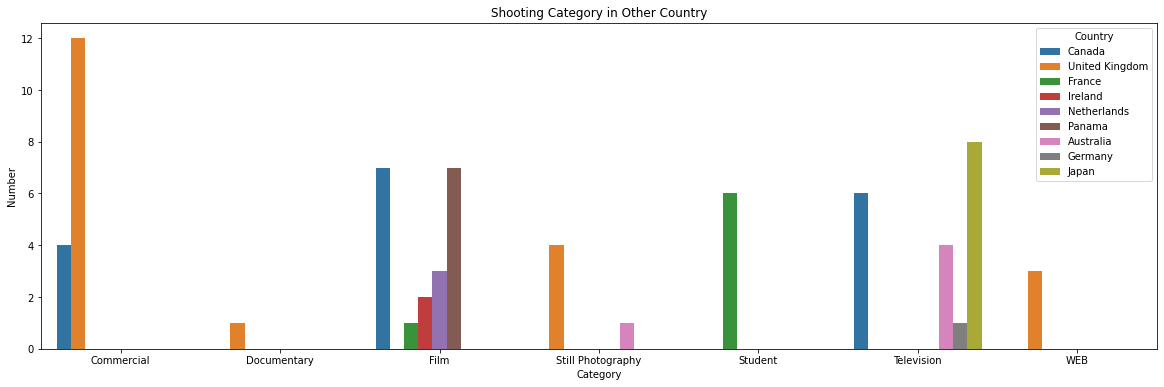

In [63]:
#Draw visual charts
#Considering the large data base of the United States, the United States is listed separately for drawing, 
#and other countries / regions are reflected in one chart.
dataset_Q4 = dataset.groupby(['Category','Country'],as_index = False)['EventID'].count()
dataset_Q4.rename(columns={"EventID":"Number"},inplace=True)

#Generate two DataFrames with only the United States and without the United States from the "Country"
dataset_us = dataset_Q4.loc[(dataset_Q4["Country"]=="United States of America")]
dataset_other = dataset_Q4.drop(dataset_Q4[dataset_Q4["Country"]=="United States of America"].index)

#Draw statistics on different shooting categories in the United States of America
plt.figure(figsize=(18,6))
sns.barplot(x = "Category", y = "Number", data = dataset_us, hue = "Country")
plt.title("Shooting Category in the United States of America")
plt.show()

#Draw statistics on different shooting categories in other countries/regions
plt.figure(figsize=(20,6))
sns.barplot(x = "Category", y = "Number", data = dataset_other, hue = "Country")
plt.title("Shooting Category in Other Country")
plt.show()

- According to the digital statistics and "Category Horizontal Column Chart", it can be reflected that among all shooting categories, television is the most, reaching 41789 items, and red carpet / Premiere is the least, with only one item.


- As shown in the above statistics and "Shooting Category in the United States of America", the United States has the largest number of shootings among all countries/regions, reaching 74,378 items, accounting for the vast majority. Among them, Television is the main shooting category, reaching 41,770 items. By contrast, other countries account for a much smaller share of the number of shots, and "Shooting Category in Other Country" reflects the statistics of all other countries on record, by category and number of shots.

## Shooting Category Analysis_Precinct

In [64]:
#Organize the original data set, especially use "," to indicate the side-by-side part,
#ensure that each precinct is taken into account.
data_police = dataset[["PolicePrecinct(s)","Category"]].copy()
data_police["PolicePrecinct(s)"] = data_police['PolicePrecinct(s)'].apply(str).map(lambda x:x.split(',')) 
dataset_Q5 = data_police.explode("PolicePrecinct(s)")
dataset_category = dataset_Q5["Category"].unique()

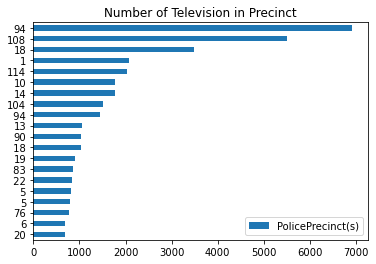

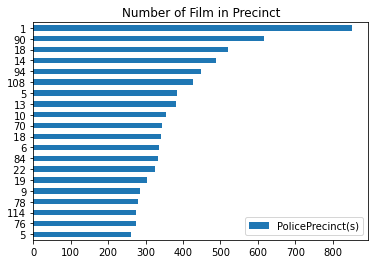

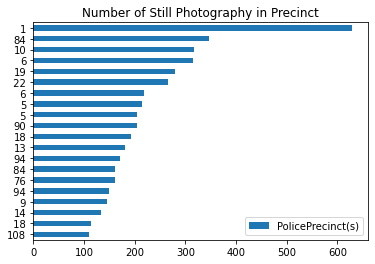

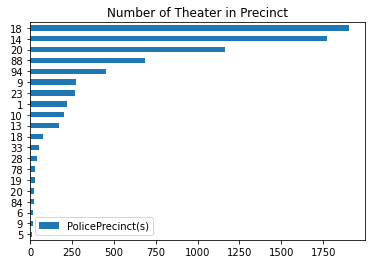

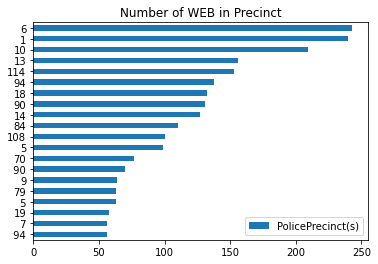

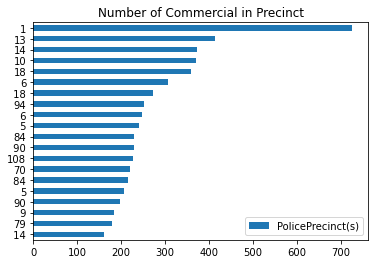

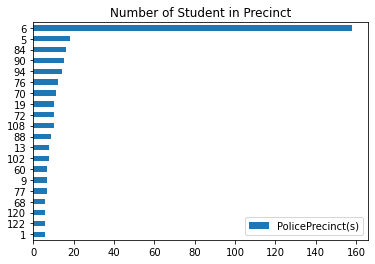

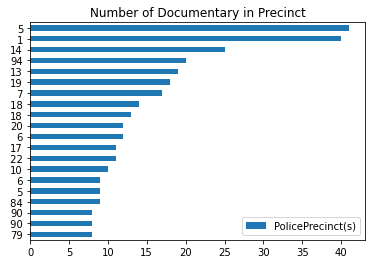

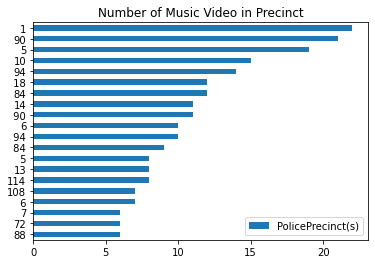

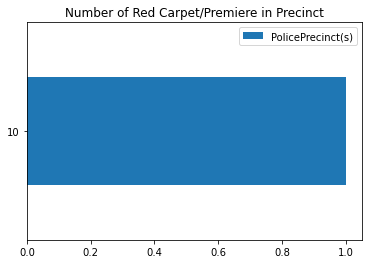

In [65]:
#Count the number of shooting items of each category in different PolicePrecincts, and draw horizontal column charts
for i in dataset_category:
    dataset_num = dataset_Q5.loc[(dataset_Q5["Category"]== i)]
    dataset_num = pd.DataFrame(dataset_num["PolicePrecinct(s)"].value_counts())
    dataset_num = dataset_num.head(20)
    dataset_num.plot(kind="barh",title="Number of "+ i + " in Precinct").invert_yaxis()

The above picture is the statistics of the number of shots of different types of shooting projects in different precincts, as shown in the above picture:

- The most popular precinct in Television is 94
- The most popular precinct in Film is 1
- The most popular precinct in Still photography is 1
- The most popular precinct in Theatre is 18
- The most popular precinct in Web is 6
- The most popular precinct in Commercial is 1
- The most popular precinct in Student is 6
- The most popular precinct in Documentary is 5
- The most popular precinct in Music video is 1
- The most popular precinct in Red carpet/premiere is 10